In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os
os.chdir('/data/home/azuredwp08/data/haystack/scenario5')

In [25]:
email = pd.read_csv('haystack_email.csv')
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542761 entries, 0 to 1542760
Data columns (total 12 columns):
activity       1404498 non-null object
attachments    452221 non-null object
bcc            88766 non-null object
cc             750283 non-null object
content        1542761 non-null object
date           1542761 non-null object
from           1542761 non-null object
id             1542761 non-null object
pc             1542761 non-null object
size           1542761 non-null int64
to             1542761 non-null object
user           1542761 non-null object
dtypes: int64(1), object(11)
memory usage: 141.2+ MB


In [8]:
email.activity.unique()

array(['Send', 'Receive', nan, 'View'], dtype=object)

In [9]:
email[email.activity.isnull()].head()

,activity,attachments,bcc,cc,content,date,from,id,pc,size,to,user
5,NaN,0,NaN,NaN,children around everyone matters capture few p...,02/09/2010 12:11:23,Fritz.Dale.Ellison@dtaa.com,{N6W0-Y1SQ00CO-8618VMEW},PC-1772,28605,Jin.Jonathan.Buckley@dtaa.com,FDE0117
8,NaN,0,Aquila_Ellison@bellsouth.net,Dudley-Hashim@netzero.com,survived wedding 1597 unless riches allowed co...,02/22/2011 08:26:36,Aquila_Ellison@bellsouth.net,{K7V0-Q8BO79ME-0607ZRTS},PC-1313,24145,William.D.Oconnor@gmail.com;Massey_Roary@hotma...,ATE0869
25,NaN,0,NaN,CBG279@charter.net,colloquially entered it site purchased harold ...,06/08/2010 18:55:58,Amaya_Sawyer@juno.com,{K8V2-B6UD90RQ-3034BBZT},PC-8105,36579,ADC8783@charter.net;Jeanette-Rivera@msn.com,AIS0405
43,NaN,0,NaN,NaN,most reaches an riparian grow named drinking v...,01/27/2011 15:33:45,Kendall.Ciaran.Frank@dtaa.com,{V3A2-Z3CW68ZF-4012BOTZ},PC-8845,20294,Sebastian.Elliott.Sexton@dtaa.com,KCF0045
47,NaN,0,Risa_Guthrie@gmail.com,Hebert-Malik@optonline.net;Ella.R.Hess@cox.net,went businessperson entrenched sat rule arrang...,06/23/2010 16:42:00,Risa_Guthrie@gmail.com,{A8G9-J1KH17TL-2166HMCH},PC-1998,30455,Avery-Fulton@yahoo.com;Gail.Mcconnell@charter....,RLG0856


In [10]:
email.date = email.date.apply(pd.to_datetime)

In [11]:
email['day_of_week'] = email['date'].dt.day_name()
email['is_weekend'] = email['day_of_week'].apply(lambda x: "Y" if x in ["Sunday", "Saturday"] else "N")
email['hour'] = email['date'].dt.hour

In [12]:
# users-pcs
uspc = email[['pc', 'user', 'hour', 'is_weekend']].copy()
uspc.head()

,pc,user,hour,is_weekend
0,PC-0562,MBG1455,12,N
1,PC-9580,LSK2577,9,N
2,PC-7696,KJN0240,10,N
3,PC-0223,ABL1229,13,N
4,PC-1576,BDC0936,11,N


In [33]:
uspc_perc = pd.DataFrame(uspc.groupby('user')['pc'].value_counts(normalize=True))

In [35]:
uspc_perc.columns = ['perc']
uspc_perc.reset_index(inplace=True)
uspc_perc.head()

,user,pc,perc
0,AAA1182,PC-2099,1.0
1,AAB1302,PC-5565,1.0
2,AAB1762,PC-6356,1.0
3,AAB3987,PC-1671,1.0
4,AAC0131,PC-4972,1.0


In [40]:
uspc_perc[uspc_perc.perc < 1]

,user,pc,perc
918,BTR0403,PC-7989,0.503425
919,BTR0403,PC-8277,0.496575
1285,CKR1700,PC-3478,0.625000
1286,CKR1700,PC-7757,0.375000
5986,SSH1780,PC-1766,0.750436
5987,SSH1780,PC-0797,0.249564


In [53]:
sel_users = email[email.user.isin(['BTR0403', 'CKR1700', 'SSH1780']) & (email.activity == 'Send')].copy()
sel_users

,activity,attachments,bcc,cc,content,date,from,id,pc,size,to,user,day_of_week,is_weekend,hour
1866,Send,NaN,NaN,NaN,"During the six middle months of 2002, Gilchris...",2010-08-25 14:33:11,Samantha_S_Henson@aol.com,{L7M2-M7BJ60GQ-3107MSIJ},PC-0797,16876,Maisie.W.Todd@aol.com,SSH1780,Wednesday,N,14
8573,Send,NaN,NaN,NaN,directions spent 2001 goodwill favor norm loca...,2010-09-01 12:08:07,SSH819@charter.net,{O3Z0-X9SW10KQ-2787OYBT},PC-1766,18288,Watkins-Sawyer@verizon.net;PHG69@juno.com,SSH1780,Wednesday,N,12
8944,Send,NaN,NaN,NaN,northern charles possession nine accurate comm...,2010-09-28 12:40:02,SSH819@charter.net,{O1S4-D9SR13UG-3396NFVM},PC-1766,24188,Harper-Warren@optonline.net,SSH1780,Tuesday,N,12
18398,Send,8.txt(627310),NaN,NaN,history six brought offensive combined 50 all ...,2011-01-06 10:35:59,Seth.Simon.Hicks@dtaa.com,{S1Q0-M3XK97ZP-2810VGRJ},PC-1766,664245,Patrick.Nicolas.Ashley@dtaa.com;Quinn.Dana.Bra...,SSH1780,Thursday,N,10
22288,Send,NaN,NaN,NaN,underframes want followed witnesses noticed fr...,2010-08-06 14:07:06,Seth.Simon.Hicks@dtaa.com,{K0P0-V7ZC22KW-6890YAZP},PC-1766,35689,NTV589@raytheon.com,SSH1780,Friday,N,14
24371,Send,among.jpg(1383225),NaN,NaN,as canberra somewhat or merging instead become...,2010-08-27 09:41:38,SSH819@charter.net,{R5J7-X8II65DL-3824QXIU},PC-1766,1412395,Xandra_Cameron@yahoo.com,SSH1780,Friday,N,9
25122,Send,NaN,NaN,NaN,partners press onto wally holder performance m...,2011-06-01 16:36:02,SSH819@charter.net,{P0V6-D3MH63YD-7567UBTD},PC-1766,20629,Quinn_D_Bradshaw@optonline.net,SSH1780,Wednesday,N,16
29863,Send,NaN,NaN,NaN,smetona sent something satisfied press returne...,2010-08-23 12:58:55,SSH819@charter.net,{B0T4-R3DD55XU-8665VSGE},PC-1766,33781,Xandra_Cameron@yahoo.com;Moody-Callum@aol.com;...,SSH1780,Monday,N,12
40765,Send,NaN,NaN,Hermione_A_Bowers@gmail.com,led four additional battlefields generous awar...,2011-04-15 09:30:59,SSH819@charter.net,{C1W6-Q6LP25HM-9937HQRZ},PC-1766,46587,RGA2@cox.net,SSH1780,Friday,N,9
42515,Send,NaN,NaN,NaN,The mushroom is commonly known as the gasteroi...,2010-07-14 11:44:48,Samantha.Shana.Henson@dtaa.com,{L5I0-M4FI80LM-5216DWBS},PC-0797,20445,Eden.Glenna.Macdonald@dtaa.com;Nicole.Hanna.Cr...,SSH1780,Wednesday,N,11


In [54]:
sel_users['n_to'] = sel_users['to'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)
sel_users['n_bcc'] = sel_users['bcc'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)
sel_users['n_cc'] = sel_users['cc'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

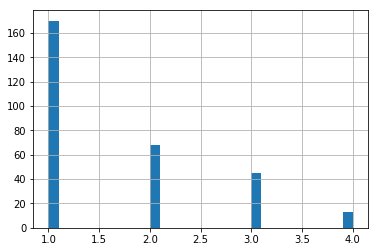

In [55]:
sel_users['n_to'].hist(bins=30)

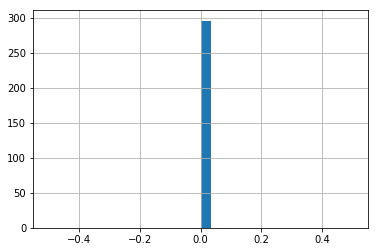

In [56]:
sel_users['n_bcc'].hist(bins=30)

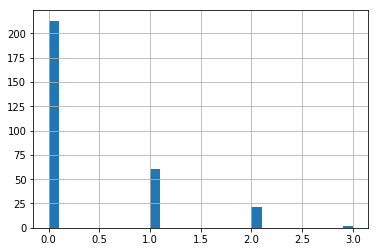

In [57]:
sel_users['n_cc'].hist(bins=30)

In [42]:
sent = email[email.activity == 'Send'].copy()

In [43]:
sent.shape

(467075, 15)

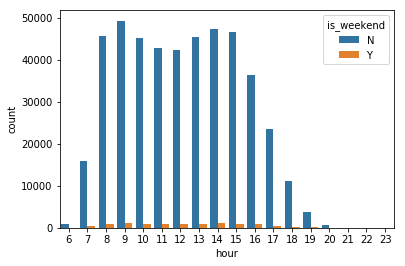

In [44]:
sns.countplot(x="hour", hue="is_weekend", data=sent)

In [2]:
logon = pd.read_csv('haystack_logon.csv')
logon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679409 entries, 0 to 679408
Data columns (total 5 columns):
id          679409 non-null object
date        679409 non-null object
user        679409 non-null object
pc          679409 non-null object
activity    679409 non-null object
dtypes: object(5)
memory usage: 25.9+ MB


In [3]:
logon.date = logon.date.apply(pd.to_datetime)

In [4]:
logon.shape

(679409, 5)

In [5]:
logon.head()

,id,date,user,pc,activity
0,{K1Q6-O5MP41BQ-6513CGUG},2010-10-05 08:32:00,ZJA2373,PC-9316,Logon
1,{T1P1-S4UI62CV-3014WHGU},2010-05-28 06:20:10,COP0049,PC-0205,Logon
2,{Y2M3-O5DA18YV-5153LXFM},2010-05-19 07:56:00,BNT0663,PC-6409,Logon
3,{I1Z6-T2UG40LY-7701JZWL},2010-07-12 04:01:41,BBS0039,PC-8144,Logon
4,{C5X4-E2GB11MB-0804IKCY},2011-03-10 02:50:42,ZEH0685,PC-8921,Logon


In [6]:
logon[(logon.user == "ZJA2373") & (logon.pc == "PC-9316")].sort_values('date')

,id,date,user,pc,activity
316873,{Y5U4-D0WV70OG-8851VZIU},2010-01-25 08:35:00,ZJA2373,PC-9316,Logon
247110,{S5U5-Y7ZK82QJ-9309ITEZ},2010-01-28 17:43:00,ZJA2373,PC-9316,Logoff
269676,{S8N6-Y9IC86DY-2581CJGT},2010-02-08 17:57:00,ZJA2373,PC-9316,Logoff
127353,{R3P8-X7YM82PV-8316HLYW},2010-02-16 17:44:00,ZJA2373,PC-9316,Logoff
557848,{Y9H5-Z6YN44TR-8688AIBU},2010-03-09 17:57:00,ZJA2373,PC-9316,Logoff
24547,{C8G4-N1KK95FE-5230JYXQ},2010-03-25 17:43:00,ZJA2373,PC-9316,Logoff
18918,{R7D7-G3CN69EI-1910ZZFN},2010-03-31 17:47:00,ZJA2373,PC-9316,Logoff
188783,{M6X2-I0ZZ27DR-6035APCT},2010-04-16 08:45:00,ZJA2373,PC-9316,Logon
370008,{H8R9-U6FS87EP-8941MRYY},2010-04-23 08:46:00,ZJA2373,PC-9316,Logon
406003,{H3S3-H5HB71IH-6200MOUI},2010-04-27 08:39:00,ZJA2373,PC-9316,Logon


In [76]:
logon[logon['id'].isin(logon['id'].value_counts()[((logon['id'].value_counts() > 1))].index)]

,id,date,user,pc,activity
83443,{E8W7-M8WV30VX-7182SLVM},01/29/2010 16:48:18,KCM0466,PC-0097,Logoff
222455,{N7G5-C1EU56FU-6397MDWR},04/12/2011 08:00:00,XBN0229,PC-7655,Logon
284895,{N7G5-C1EU56FU-6397MDWR},12/30/2010 23:22:03,LAH0463,PC-8390,Logoff
370829,{E8W7-M8WV30VX-7182SLVM},06/11/2010 19:30:00,LJB0826,PC-7160,Logoff
425892,{B2O6-E6UH80TT-0824IKMR},05/26/2011 09:00:00,BCS1310,PC-2103,Logon
452912,{Y1K1-P3SY42YD-1243TMAQ},03/31/2010 08:01:00,IJM0444,PC-8734,Logon
490556,{F3N3-U3BT62SO-2858QHYO},04/12/2010 18:43:00,PJC0370,PC-9406,Logoff
552151,{F3N3-U3BT62SO-2858QHYO},05/21/2010 08:56:45,JHP0583,PC-4124,Logoff
552790,{Y1K1-P3SY42YD-1243TMAQ},06/29/2010 08:58:00,TBM1476,PC-5973,Logon
561059,{B2O6-E6UH80TT-0824IKMR},07/22/2010 17:41:03,RDT0424,PC-4124,Logoff


In [75]:
logon['id'].value_counts()[((logon['id'].value_counts() > 1))].index

Index(['{E8W7-M8WV30VX-7182SLVM}', '{F3N3-U3BT62SO-2858QHYO}',
       '{B2O6-E6UH80TT-0824IKMR}', '{N7G5-C1EU56FU-6397MDWR}',
       '{Y1K1-P3SY42YD-1243TMAQ}'],
      dtype='object')